In [142]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [143]:
df = pd.read_csv('F:/AIML/AIML Projects/Bank_Churn_Prediction/Churn_Modelling.csv', delimiter=',')

In [212]:
df1 = pd.read_csv('F:/AIML/AIML Projects/Bank_Churn_Prediction/Churn_Modelling.csv', delimiter=',')

In [144]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [145]:
df.shape

(10000, 14)

In [146]:
df.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [147]:
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [148]:
df.dtypes

RowNumber            int64
CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [159]:
# numerical columns
num_cols = df.select_dtypes(include=['int64','float64'])

# Object cols
obj_cols = df.select_dtypes(include=['object']).columns

# # fill the Null vules in the data
# # for Numerical cols using median
# # for object cols with unknown

# for i in data.columns:
#     if i in num_cols:
#         data[i] = data[i].fillna(0)
#     elif i in obj_cols:
#         data[i] = data[i].fillna('unknown')

In [161]:
num_cols.drop(['RowNumber','CustomerId'], axis=1, inplace=True)
num_cols

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,42,2,0.00,1,1,1,101348.88,1
1,608,41,1,83807.86,1,0,1,112542.58,0
2,502,42,8,159660.80,3,1,0,113931.57,1
3,699,39,1,0.00,2,0,0,93826.63,0
4,850,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,0
9996,516,35,10,57369.61,1,1,1,101699.77,0
9997,709,36,7,0.00,1,0,1,42085.58,1
9998,772,42,3,75075.31,2,1,0,92888.52,1


In [203]:
# fill the Null vules in the data
# for Numerical cols using median
# for object cols with unknown

for i in df.columns:
    if i in num_cols:
        df[i] = df[i].fillna(0)
    elif i in obj_cols:
        df[i] = df[i].fillna('unknown')

In [204]:
np.isnan(df.any()) #and gets False
np.isfinite(df.all()) #and gets True

CreditScore       True
Geography         True
Gender            True
Age               True
Balance           True
NumOfProducts     True
IsActiveMember    True
Exited            True
dtype: bool

In [162]:
obj_cols

Index(['Surname', 'Geography', 'Gender'], dtype='object')

In [163]:
# Value_counts of the columns
for i in df.columns:
    print(df[i].value_counts())

2049    1
8865    1
6806    1
4759    1
8857    1
       ..
9526    1
5432    1
7481    1
1338    1
2047    1
Name: RowNumber, Length: 10000, dtype: int64
15695872    1
15801062    1
15682268    1
15647453    1
15684319    1
           ..
15629677    1
15773039    1
15766896    1
15719793    1
15812607    1
Name: CustomerId, Length: 10000, dtype: int64
Smith         32
Martin        29
Scott         29
Walker        28
Brown         26
              ..
Feetham        1
Amies          1
Fink           1
Whitelegge     1
Pino           1
Name: Surname, Length: 2932, dtype: int64
850    233
678     63
655     54
667     53
705     53
      ... 
412      1
351      1
365      1
373      1
423      1
Name: CreditScore, Length: 460, dtype: int64
France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64
Male      5457
Female    4543
Name: Gender, dtype: int64
37    478
38    477
35    474
36    456
34    447
     ... 
92      2
88      1
82      1
85      1
83      1
Name:

In [164]:
# Unique values.
for col in obj_cols:
    print('{} : '.format(col),df[col].unique())

Surname :  ['Hargrave' 'Hill' 'Onio' ... 'Kashiwagi' 'Aldridge' 'Burbidge']
Geography :  ['France' 'Spain' 'Germany']
Gender :  ['Female' 'Male']


In [165]:
# convert Categorical to continuous using LabelEncoder.
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

for i in obj_cols:
    df[i] = le.fit_transform(df[i])

In [166]:
from scipy.stats import chi2_contingency,ttest_ind

In [167]:
# perform T-Sample ttest.
# A t-test is a type of inferential statistic used to determine if there is a significant difference between the means of two groups, 
# which may be related in certain features. The t-test is one of many tests used for the purpose of hypothesis testing in statistics.
for i in num_cols:
    g1 = np.array(df[df['Exited'] == 0][i])
    g2 = np.array(df[df['Exited'] == 1][i])
    
    t,p = ttest_ind(g1,g2,axis=0,equal_var=False)
    
    if p<0.05:
        print('UseFull for modeling',i)
    else:
        print('NotUseFull for modeling',i)

UseFull for modeling CreditScore
UseFull for modeling Age
NotUseFull for modeling Tenure
UseFull for modeling Balance
UseFull for modeling NumOfProducts
NotUseFull for modeling HasCrCard
UseFull for modeling IsActiveMember
NotUseFull for modeling EstimatedSalary
UseFull for modeling Exited


In [168]:
df = df.drop(['RowNumber','CustomerId','Tenure','HasCrCard','EstimatedSalary'], axis=1)
num_cols = num_cols.drop(['RowNumber','CustomerId','Tenure','HasCrCard','EstimatedSalary'])
df

KeyError: "['RowNumber' 'CustomerId' 'Tenure' 'HasCrCard' 'EstimatedSalary'] not found in axis"

In [169]:
df

,Surname,CreditScore,Geography,Gender,Age,Balance,NumOfProducts,IsActiveMember,Exited
0,1115,619,0,0,42,0.00,1,1,1
1,1177,608,2,0,41,83807.86,1,1,0
2,2040,502,0,0,42,159660.80,3,0,1
3,289,699,0,0,39,0.00,2,0,0
4,1822,850,2,0,43,125510.82,1,1,0
...,...,...,...,...,...,...,...,...,...
9995,1999,771,0,1,39,0.00,2,0,0
9996,1336,516,0,1,35,57369.61,1,1,0
9997,1570,709,0,0,36,0.00,1,1,1
9998,2345,772,1,1,42,75075.31,2,0,1


chi2_contingency(observed, correction=True, lambda_=None)
Chi-square test of independence of variables in a contingency table. This function computes the chi-square statistic and p-value for the hypothesis test of independence of the observed frequencies in the contingency table observed.

A chi-square test is a statistical test used to compare observed results with expected results. The purpose of this test is to determine if a difference between observed data and expected data is due to chance, or if it is due to a relationship between the variables you are studying.

In [170]:
# chi2 Test for categorical values
for i in obj_cols:
    cb = pd.crosstab(df['Exited'],df[i])
    chi,p,dof,exp = chi2_contingency(cb)

    if p<0.05:
        print('Usefull : ',i)
    else:
        print('Not USefull ; ',i)

Not USefull ;  Surname
Usefull :  Geography
Usefull :  Gender


In [171]:
df = df.drop(['Surname'], axis=1)
obj_cols = num_cols.drop(['Surname'])
df

KeyError: "['Surname'] not found in axis"

In [172]:
df

,CreditScore,Geography,Gender,Age,Balance,NumOfProducts,IsActiveMember,Exited
0,619,0,0,42,0.00,1,1,1
1,608,2,0,41,83807.86,1,1,0
2,502,0,0,42,159660.80,3,0,1
3,699,0,0,39,0.00,2,0,0
4,850,2,0,43,125510.82,1,1,0
...,...,...,...,...,...,...,...,...
9995,771,0,1,39,0.00,2,0,0
9996,516,0,1,35,57369.61,1,1,0
9997,709,0,0,36,0.00,1,1,1
9998,772,1,1,42,75075.31,2,0,1


# Exploratory Data Analysis:

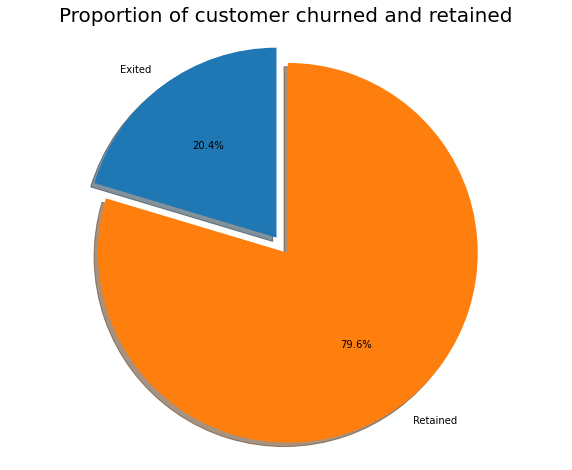

In [173]:
labels = 'Exited', 'Retained'
sizes = [df.Exited[df['Exited']==1].count(), df.Exited[df['Exited']==0].count()]
explode = (0, 0.1)
fig1, ax1 = plt.subplots(figsize=(10, 8))
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')
plt.title("Proportion of customer churned and retained", size = 20)
plt.show()

20% of the customers have exited. We need to build a model that will predict these 20% customers that will churn out.So that they can be retained.

<AxesSubplot:xlabel='IsActiveMember', ylabel='count'>

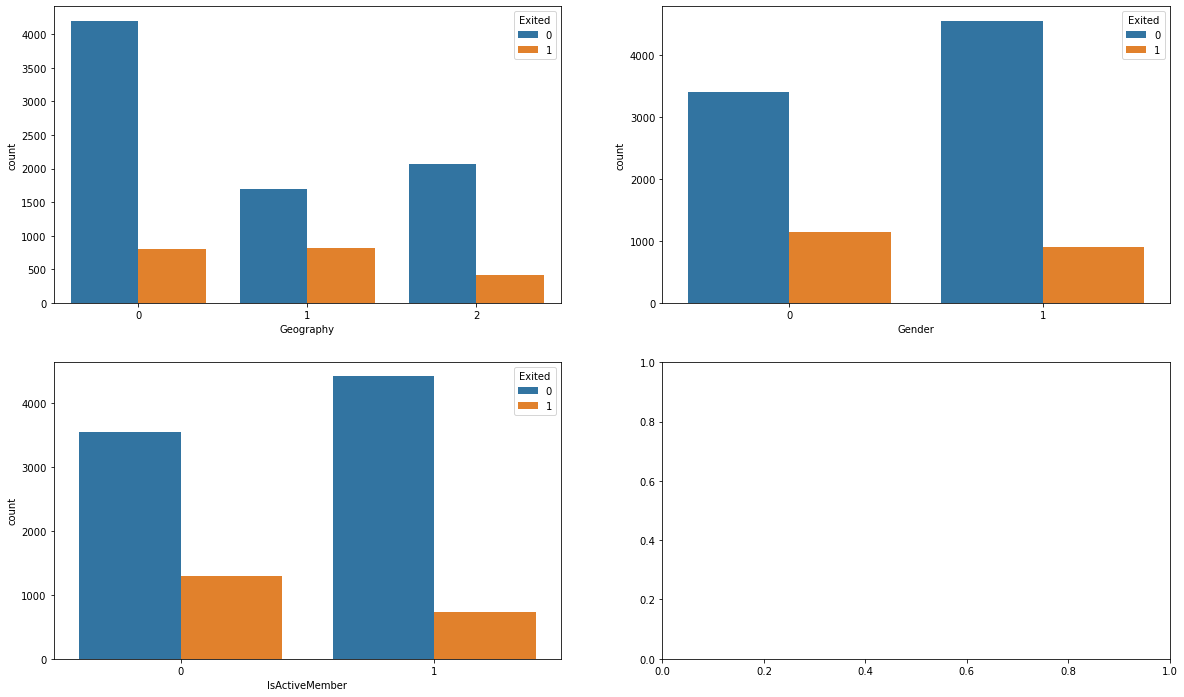

In [174]:
 # We first review the 'Exited' relation with categorical variables
fig, axarr = plt.subplots(2, 2, figsize=(20, 12))
sns.countplot(x='Geography', hue = 'Exited',data = df, ax=axarr[0][0])
sns.countplot(x='Gender', hue = 'Exited',data = df, ax=axarr[0][1])
#sns.countplot(x='HasCrCard', hue = 'Exited',data = df, ax=axarr[1][0])
sns.countplot(x='IsActiveMember', hue = 'Exited',data = df, ax=axarr[1][0])

Majority of the data is from persons from France. 

The proportion of female customers churning is also greater than that of male customers.

Unsurprisingly the inactive members have a greater churn. Worryingly is that the overall proportion of inactive mebers is quite high suggesting that the bank may need a program implemented to turn this group to active customers as this will definately have a positive impact on the customer churn.

<AxesSubplot:xlabel='Exited', ylabel='NumOfProducts'>

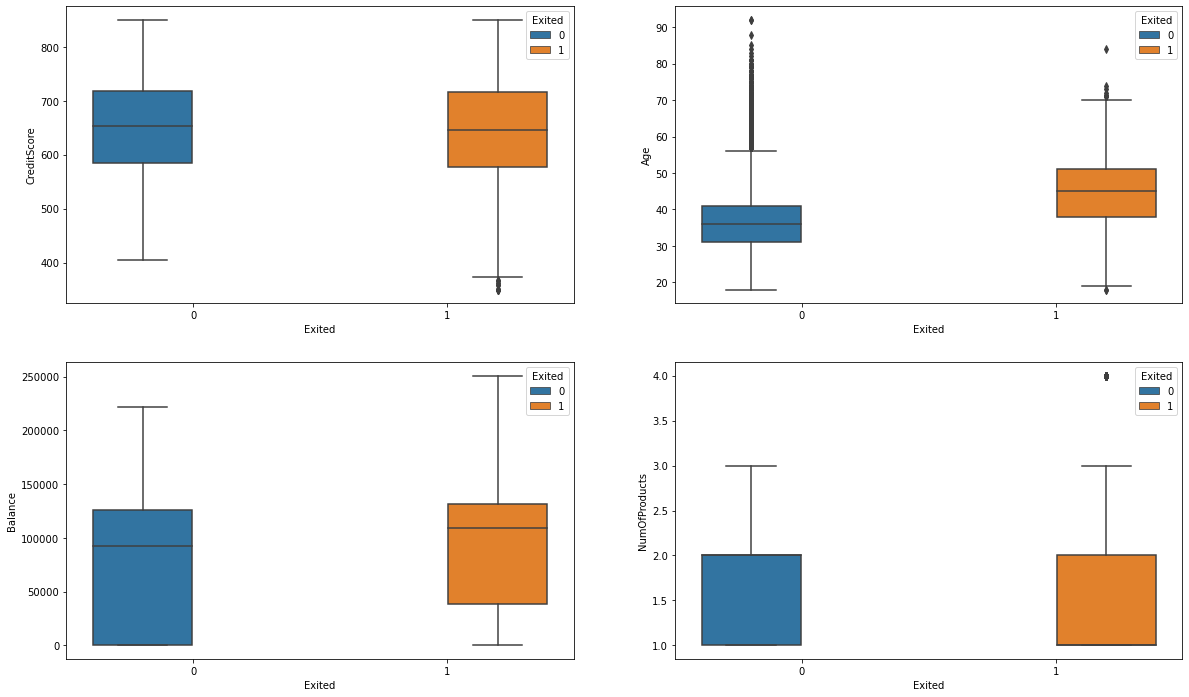

In [175]:
# Relations based on the continuous data attributes
fig, axarr = plt.subplots(2, 2, figsize=(20, 12))
sns.boxplot(y='CreditScore',x = 'Exited', hue = 'Exited',data = df, ax=axarr[0][0])
sns.boxplot(y='Age',x = 'Exited', hue = 'Exited',data = df , ax=axarr[0][1])
#sns.boxplot(y='Tenure',x = 'Exited', hue = 'Exited',data = df, ax=axarr[1][0])
sns.boxplot(y='Balance',x = 'Exited', hue = 'Exited',data = df, ax=axarr[1][0])
sns.boxplot(y='NumOfProducts',x = 'Exited', hue = 'Exited',data = df, ax=axarr[1][1])
#sns.boxplot(y='EstimatedSalary',x = 'Exited', hue = 'Exited',data = df, ax=axarr[2][1])

There is no significant difference in the credit score distribution between retained and churned customers.

The older customers are churning at more than the younger ones alluding to a difference in service preference in the age categories. The bank may need to review their target market or review the strategy for retention between the different age groups.

With regard to the tenure, the clients on either extreme end (spent little time with the bank or a lot of time with the bank) are more likely to churn compared to those that are of average tenure.

Worryingly, the bank is losing customers with significant bank balances which is likely to hit their available capital for lending.

Neither the product nor the salary has a significant effect on the likelihood to churn.

In [176]:
# handle outliers
# fill the mode value in the Outliers.
def outliers(df):
    for col in num_cols:
        # 1st quartile
        Q1 = np.percentile(df[col],25)
        # 3rd quartile
        Q3 = np.percentile(df[col],75)
        # IQR
        IQR = Q3 - Q1
        # upper Bound
        upper = Q3 + 1.5*IQR
        # Lower bound
        lower = Q1-1.5*IQR
        # Count for Outliers before converting
        print('Outliers Before replacing Median',col,': ',df[col].loc[(df[col] > upper) | (df[col] < lower)].count())
        # replacing median in outliers
        df[col]= df[col].mask(df[col] > upper, df[col].mode())
        df[col]= df[col].mask(df[col] < lower, df[col].mode())

        print('Outliers After replacing Median',col,': ',df[col].loc[(df[col] > upper) | (df[col] < lower)].count(),'\n\n')

In [182]:
# outliers(df)

<AxesSubplot:>

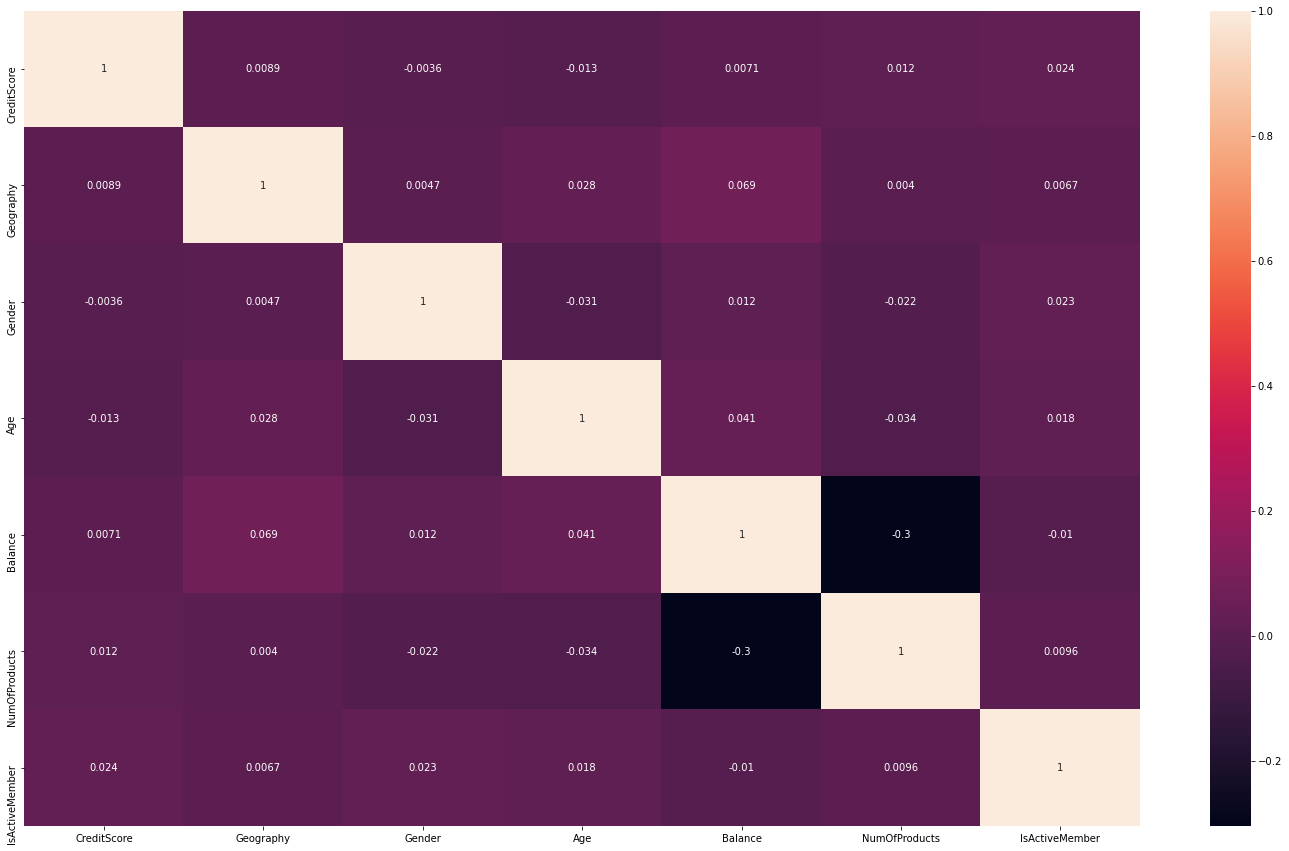

In [181]:
plt.figure(figsize=(25,15))
sns.heatmap(df.drop('Exited',axis=1).corr(),annot=True)

In [122]:
# Transform features by scaling each feature to a given range.

# This estimator scales and translates each feature individually such that it is in the given range on the training set, e.g. between zero and one.
# # perform Normalization using MinmaxScaler.
# from sklearn.preprocessing import MinMaxScaler

# ss = MinMaxScaler()
# df[num_cols] = ss.fit_transform(df[num_cols])

In [198]:
X = df.drop('Exited', axis=1)
y = df['Exited']

In [199]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [200]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(6700, 7)
(3300, 7)
(6700,)
(3300,)


# Decission Tree:

In [201]:
# Building Decision tree model
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report,f1_score

dtree = DecisionTreeClassifier(random_state=256)
dtree.fit(X_train, y_train)

dtree_predict = dtree.predict(X_test)

print('Accuracy on Train data: %0.2f'%dtree.score(X_train, y_train))
print(np.sum(dtree_predict==1))
print(np.sum(dtree_predict==0))

Accuracy on Train data: 1.00
707
2593


# Random Forest:

In [202]:
from sklearn.ensemble import RandomForestClassifier

# RandomForest Model
rf_model = RandomForestClassifier(max_depth=5,max_features='auto',random_state=1,criterion='entropy')

# train the model
rf_model.fit(X_train,y_train)
y_pred_rf = rf_model.predict(X_test)

print('Train Accuracy :',rf_model.score(X_train,y_train))
print(np.sum(y_pred_rf==1))
np.sum(y_pred_rf==0)

Train Accuracy : 0.8522388059701492
250


3050

In [205]:
# define a funtion which gives best Accuracy score.
def score(model):
    model.fit(X_train,y_train)
    predict = model.predict(X_test)

    print('train Accuracy :',model.score(X_train,y_train))

    print(np.sum(predict==1))
    print(np.sum(predict==0))
    return predict

# Ensemble:

In [206]:
from sklearn.ensemble import BaggingClassifier,AdaBoostClassifier,GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB

# make the bagging classifier model with best parameters
bgcl_best = BaggingClassifier(random_state=42,
                              base_estimator=dtree,
                              n_estimators = 100,
                              max_samples=len(X_train),
                              bootstrap=True,
                              n_jobs=-1)


# make the AdaBoost classifier with best parameters
adcl_best = AdaBoostClassifier(random_state=10,
                               n_estimators=50,
                               learning_rate=1.0,
                               base_estimator=dtree,
                               algorithm='SAMME.R')


# make gradient Boost Classifier with best parameters
gbcl_best = GradientBoostingClassifier(random_state=10,
                                       n_estimators=200,
                                       min_samples_split=50,
                                       min_samples_leaf=1,
                                       min_impurity_split=0.5,
                                       max_leaf_nodes=10,
                                       max_features='sqrt',
                                       max_depth=3,
                                       loss='exponential',
                                       learning_rate=0.1,
                                       criterion='mse',
                                       ccp_alpha=0.0)

In [207]:
# score for bgcl
score(bgcl_best)

train Accuracy : 0.9998507462686567
479
2821


array([0, 0, 0, ..., 0, 0, 1], dtype=int64)

In [208]:
# score for adcl
score(adcl_best)

train Accuracy : 0.9998507462686567
661
2639


array([0, 0, 0, ..., 0, 1, 1], dtype=int64)

In [209]:
# score for gbcl
score(gbcl_best)

train Accuracy : 0.8683582089552239
422
2878


array([0, 0, 0, ..., 0, 0, 1], dtype=int64)

# Observation : 
We can see that RandomForest and Gradient Boosting have Performed badly.
We can select any one of Decision Tree, Adaboosting and Bagging classifier as best model.

In [227]:
# score for bgcl-model
predict = score(bgcl_best)

train Accuracy : 0.9998507462686567
479
2821


In [229]:
# Save the predict datafile.
submission_data = pd.DataFrame({'Id':df1.CustomerId,'Exited':predict})

submission_data.to_csv('submission_file.csv',index=False)

# result_frame = pd.DataFrame({'index': test_subdata['id'].values, 'match_1': m1, 
#                          'pred1': predicciones['pred1'].values})

ValueError: array length 3300 does not match index length 10000